# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Click here to show/hide the code:

In [1]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [2]:
%matplotlib inline

# remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

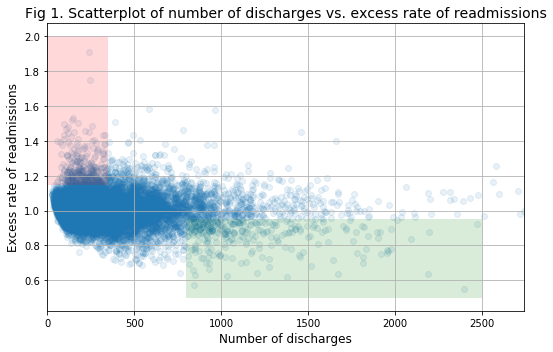

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
# x = [a for a in clean_hospital_read_df['Number of Discharges']]
# y = list(clean_hospital_read_df['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.1)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Fig 1. Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****
# Exercise

Include your work on the following **in this notebook and submit to your Github account**. 



# A. Do you agree with the above analysis and recommendations? Why or why not?

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 
### Critique:
- The overall **excess readmissions ratio** appears mostly flat as number of discharges increases. The slight downward slope is not large enough to be meaningful. 


**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 
### Critique:
- The trends reported here are a "just-so story". The thresholds of < 100 and > 1000 are arbitrarily chosen and samples with discharges in the range of 100-900 are ignored. Considering all discharges for the **overall** data, there appears to be little or no trend.

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
### Critique:
- No significance test was presented so this conclusion is not supported. When I ran a test (test #1 below) of whether the linear regression slope of these two variables was different from zero, the result was significant, however the slope was very small (-0.00003), indicating only a very small correlation. I would conclude that the relationship between these two variables overall was not meaningful. 

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.
### Critique:
- Reccomendations are based on invalid conclusions.

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

## Answers below:

In [6]:
### More cleanup and add two new columns:

# drop rows w/ NaN in 'Excess Readmission Ratio'
clean_hospital_read_df = (clean_hospital_read_df
                          [clean_hospital_read_df
                           ['Excess Readmission Ratio'].notna()])

# create human readable measure names
clean_hospital_read_df['Measure Name HR'] = (
    clean_hospital_read_df['Measure Name'].map({
        'READM-30-AMI-HRRP':'Acute Myocardial Infarction',
        'READM-30-HF-HRRP':'Heart Failure',
        'READM-30-PN-HRRP':'Pneumonia',
        'READM-30-COPD-HRRP':'Coronary Artery Bypass',
        'READM-30-HIP-KNEE-HRRP':'Total Hip/Knee Replacement'}))

# create a boolean variable for excess vs. acceptable readmissions
clean_hospital_read_df['Excess Readmissions'] = (
    clean_hospital_read_df['Excess Readmission Ratio']>1)

In [7]:
### Helper functions:

import seaborn as sns

def draw_regplot(x, y, df, title=None, size=None):
    """Draw a scatterplot with one dependent variable, with 95% CI."""
    
    scatter_kws = {"s": 10, 'alpha': 0.2}
    line_kws = {'color':'red','alpha': 0.3}
    
    if size is not None:
        fig, ax = plt.subplots(figsize=size)

    rp = sns.regplot(x, y, df,
                scatter_kws=scatter_kws,
                line_kws=line_kws,
                ci=95, n_boot=1000);
    
    if title is not None:
        plt.title(title)

    return rp

    
def draw_lmplot(x, y, df, facets, title=None, size=None):
    """Draw a scatterplot with multiple subsamples (facets).
    Each facet will have a linear regression line, with 95% CI."""
    
    scatter_kws = {"s": 10, 'alpha': 0.3}

    if size is not None:
        lmp = sns.lmplot(x, y, df, hue=facets,
                    legend=False,scatter_kws=scatter_kws,
                    ci=95, n_boot=1000,
                    height=size[1], aspect=size[0]/size[1]);
    else:
        lmp = sns.lmplot(x, y, df, hue=facets, height=7,
                    legend=False,scatter_kws=scatter_kws,
                    ci=95, n_boot=1000);

    legend = plt.legend();

    # set the legend marker alpha and size so they're visible
    for lh in legend.legendHandles:
        lh.set_alpha(1);
        lh.set_sizes([60]);
        
    if title is not None:
        plt.title(title)
        
    return lmp


### Figures 2 and 3: Number of Discharges vs Excess Readmission Ratio

- Figure 2 shows the regression line calculated for the "preliminary analysis" Figure 1, looking at Excess Readmissions Ratio vs. Number of Discharges. The line slope is extremely shallow, indicating no meaningful relationship between the variables when all samples are combined.


- Figure 3 breaks the data into the five conditions/procedures (i.e., the "Measure Name" variable), and plots regressions for each (regression results in Test 2). What we see is that three of the categories (Heart Failure, Pneumonia and Coronary Artery Bypass) have very weak correlation between excess readmissions ratio and number of discharges. Of the two others, Acute Myocardial Infarction shows a mild downward trend, while Total Hip/Knee Replacement has a much more pronounced negative slope.

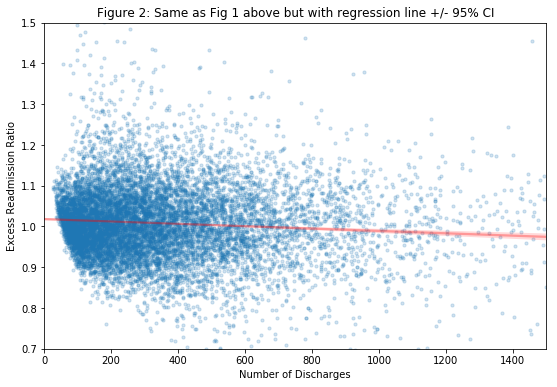

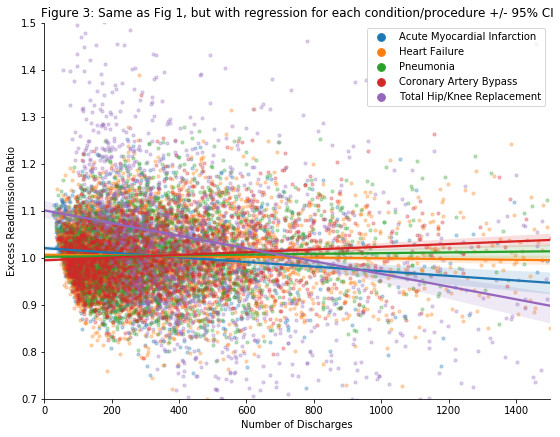

In [8]:
draw_regplot('Number of Discharges',
            'Excess Readmission Ratio',
            clean_hospital_read_df,
            title='Figure 2: Same as Fig 1 above but with regression line +/- 95% CI',
            size=[9,6]);
plt.xlim([0,1500]);
plt.ylim([.7,1.5]);

lmp = draw_lmplot('Number of Discharges',
            'Excess Readmission Ratio',
            clean_hospital_read_df,
            'Measure Name HR',
            title='Figure 3: Same as Fig 1, but with regression for each condition/procedure +/- 95% CI',
            size=[8,6]);
plt.xlim([0,1500]);
plt.ylim([.7,1.5]);


### Test #1: Are overall Number of discharges correlated with Excess rate of readmissions?

Looking at the linear regression results for overall Excess Readmissions Ratio vs. Number of Discharges, the slope is significantly different from zero, but the correlation coefficient is only -0.097, indicating that overall there is a very weak relationship between these two variables.


In [9]:
from scipy.stats import linregress

# calculate and print linear regression for overall data
slope, intercept, r_value, p_value, std_err = (
    linregress(clean_hospital_read_df['Number of Discharges'],
               clean_hospital_read_df['Excess Readmission Ratio']))

print('Test #1: overall Number of Discharges vs Excess Readmission Ratio\n')
print('linear regression result:')
print('  slope = %1.5f, intercept = %1.3f'%(slope, intercept))
print('  r-value = %1.3f, p-value = %1.3f'%(r_value, p_value))

Test #1: overall Number of Discharges vs Excess Readmission Ratio

linear regression result:
  slope = -0.00003, intercept = 1.018
  r-value = -0.097, p-value = 0.000


### Test #2: Is Number of discharges correlated with Excess rate of readmissions, considering each condition/procedure?

There is a different story if I separate the Excess Readmissions Ratio vs. Number of Discharges data by conditions/procedures (i.e., the "Measure Name" variable) and run linear regressions on each: two of the conditions/procedures (Heart Failure and Pneumonia) show no significant correlation. Of the three that have significant correlations (alpha p < .01), Coronary Artery Bypass is very weak (+0.11), Acute Myocardial Infarction is weak (-0.15) while Total Hip/Knee Replacement is moderate (-0.35). The correlation for Total Hip/Knee Replacement is an interesting outlier, and in fact this procedure stands out from the rest in other ways.

In [10]:
from collections import OrderedDict 

# human readable measure names in order of r-value 
measurenames = (['Coronary Artery Bypass',
                 'Pneumonia',
                 'Heart Failure',
                 'Acute Myocardial Infarction',
                 'Total Hip/Knee Replacement'
                ] )

# use ordered dict to perserve name orders
results = OrderedDict()

# calculate regression for each measure name, store in a dict
for measurename in measurenames:
    # extract data for this measure name
    m_df = clean_hospital_read_df[
        clean_hospital_read_df['Measure Name HR']==measurename]
    # calculate linear regression
    slope, intercept, r_value, p_value, std_err = (
        linregress(m_df['Number of Discharges'],
                   m_df['Excess Readmission Ratio']))
    # store results to dict
    results[measurename] = {'slope':slope, 'intercept':intercept, 
                            'r-value':r_value, 'p-value':p_value, 'std-err':std_err}

print('Test #2: Number of Discharges vs Excess Readmission Ratio,')
print('         regression output for each condition/procedure.\n')

# create a dataframe from the results dict
rvd = pd.DataFrame(results).T

# print a nice looking table output using pandas magic
pd.options.display.float_format = '{:,.5f}'.format
rvd[ ['p-value','r-value','slope'] ]


Test #2: Number of Discharges vs Excess Readmission Ratio,
         regression output for each condition/procedure.



,p-value,r-value,slope
Coronary Artery Bypass,0.00000,0.10737,0.00003
Pneumonia,0.19153,0.02474,0.00001
Heart Failure,0.08027,-0.03287,-0.00001
Acute Myocardial Infarction,0.00000,-0.14513,-0.00005
Total Hip/Knee Replacement,0.00000,-0.35020,-0.00014


### Figure 4: Number of readmissions vs discharges

This comparison gives the ratio of discharges to readmissions, where a steeper regression slope indicates a higher rate of readmissions per discharge. This figure shows three distinct groupings of conditions/procedures: 
- Heart Failure and Coronary Artery Bypass, with the highest rate of readmissions per discharge.


- Acute Myocardial Infarction and Pneumonia, with the intermediate rates of readmissions per discharge.


- Total Hip/Knee Replacement, with a much lower rate of readmissions per discharge than the others.

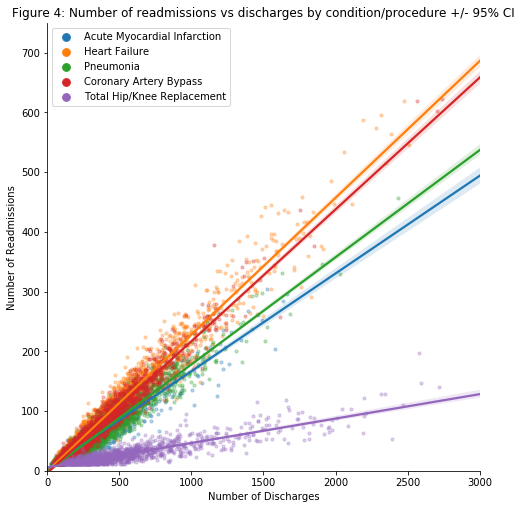

In [11]:
draw_lmplot('Number of Discharges',
            'Number of Readmissions',
            clean_hospital_read_df,
            'Measure Name HR',
            title='Figure 4: Number of readmissions vs discharges by condition/procedure +/- 95% CI');
plt.xlim([0,3000]);
plt.ylim([0,750]);


**C. Conclusions**

Only considering the overall data, there is a very weak or no correlation between Excess Readmissions Ratio and Number of Discharges. However, looking at the effect of Number of Discharges on individual conditions/procedures, we see that larger hospitals have better outcomes for Acute Myocardial Infarction and Total Hip/Knee Replacement (particularly the latter).

Considering Number of Readmissions vs. Number of Discharges for each condition/procedure reveals a strongly linear relationship, but with quite different slopes (rates of readmission per discharge) for each condition/procedure. The analysis reveals three groupings of conditions/procedures based on similarity of slope: 1) Heart Failure and Coronary Artery Bypass, 2) Acute Myocardial Infarction and Pneumonia, and 3) Total Hip/Knee Replacement. These groupings make sense: Coronary Artery Bypass is the most common procedure for treating Heart Failure, so you would expect these rates to be similar. Likewise, Acute Myocardial Infarction is frequently associated with Pneumonia. Meanwhile, Total Hip/Knee Replacement is a joint / skeletal issue, not closely related to the other conditions/procedures. It is interesting that rates of readmission are much lower for Total Hip/Knee Replacement, but this procedure shows the strongest effect of hospital size.


**D. Regulatory policy recommendations**

I would make three policy recommendations that could reduce the incidence of Excess Readmissions:

1) Investigate why Heart Failure and Coronary Artery Bypass have such relatively high rates of readmission.

2) Investigate the relationship between Acute Myocardial Infarction and Pneumonia, and devise more pro-active treatment guidelines to head off pneumonia when a patient is diagnosed with Acute Myocardial Infarction.

3) Investigate why smaller hospitals are experiencing more excess readmissions specifically for Total Hip/Knee Replacement. Is this effect due to demography (rural vs urban), deficiencies in physical therapy facilities, a shortage of specialists, differences in post-operative care, etc? Pinpointing the reason(s) could lead to policy improvements for smaller hospitals.